# How temperature affects coral reef bleaching

In [ ]:
!jt -t grade3 # set theme for better aesthetic #

___

## 1. Data Understanding

In [1]:
## load dataset using pandas ##
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
# THE LINK TO DATASET USED: https://www.bco-dmo.org/dataset/773466

df=pd.read_csv("global_bleaching_environmental.csv")
df.shape #41361 rows and 62 columns

/var/folders/q4/414ry47d1hv7zj62ggf6vkz40000gn/T/ipykernel_50703/907535879.py:1: DtypeWarning: Columns (13,15,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("global_bleaching_environmental.csv")


(41361, 62)

In [3]:
## display first and last 5 rows ##
df.head(5)

Site_ID  Sample_ID Data_Source  Latitude_Degrees  Longitude_Degrees  \
0     2501   10324336      Donner            23.163           -82.5260   
1     3467   10324754      Donner           -17.575          -149.7833   
2     1794   10323866      Donner            18.369           -64.5640   
3     8647   10328028      Donner            17.760           -64.5680   
4     8648   10328029      Donner            17.769           -64.5830   

  Ocean_Name Reef_ID            Realm_Name  \
0   Atlantic      nd     Tropical Atlantic   
1    Pacific      nd  Eastern Indo-Pacific   
2   Atlantic      nd     Tropical Atlantic   
3   Atlantic      nd     Tropical Atlantic   
4   Atlantic      nd     Tropical Atlantic   

                               Ecoregion_Name      Country_Name  ...  \
0                     Cuba and Cayman Islands              Cuba  ...   
1            Society Islands French Polynesia  French Polynesia  ...   
2  Hispaniola Puerto Rico and Lesser Antilles    United Kingdom  ...   
3  Hispaniola Puerto Rico and Lesser Antilles     United States  ...   
4  Hispaniola Puerto Rico and Lesser Antilles     United States  ...   

  TSA_FrequencyMax TSA_FrequencyMean TSA_DHW TSA_DHW_Standard_Deviation  \
0                5                 0       0                       0.74   
1                4                 0    0.26                       0.67   
2                7                 0       0                       1.04   
3                4                 0       0                       0.75   
4                5                 0       0                       0.92   

  TSA_DHWMax TSA_DHWMean        Date  \
0       7.25        0.18  2005-09-15   
1       4.65        0.19  1991-03-15   
2      11.66        0.26  2006-01-15   
3       5.64         0.2  2006-04-15   
4       6.89        0.25  2006-04-15   

                                       Site_Comments  \
0                                                 nd   
1  The bleaching does not  appear to have gained ...   
2                                                 nd   
3                                                 nd   
4                                                 nd   

                                     Sample_Comments  Bleaching_Comments  
0                                                 nd                  nd  
1  The bleaching does not  appear to have gained ...                  nd  
2                                                 nd                  nd  
3                                                 nd                  nd  
4                                                 nd                  nd  

[5 rows x 62 columns]

In [4]:
df.tail(5)

Site_ID  Sample_ID Data_Source  Latitude_Degrees  Longitude_Degrees  \
41356    15446   10310562  Reef_Check           -8.3651           116.0844   
41357    15456   10310527  Reef_Check           -8.3473           116.0503   
41358    15456   10310527  Reef_Check           -8.3473           116.0503   
41359    15457   10310536  Reef_Check           -8.3445           116.0629   
41360    15457   10310536  Reef_Check           -8.3445           116.0629   

      Ocean_Name                     Reef_ID            Realm_Name  \
41356    Pacific       116.5.3.9E.8.21.54.4S  Central Indo-Pacific   
41357    Pacific       116.3.1.1E.8.20.50.2S  Central Indo-Pacific   
41358    Pacific       116.3.1.1E.8.20.50.2S  Central Indo-Pacific   
41359    Pacific  116.3.46.548E.8.20.40.236S  Central Indo-Pacific   
41360    Pacific  116.3.46.548E.8.20.40.236S  Central Indo-Pacific   

                          Ecoregion_Name Country_Name  ... TSA_FrequencyMax  \
41356  Lesser Sunda Islands and Savu Sea    Indonesia  ...                8   
41357  Lesser Sunda Islands and Savu Sea    Indonesia  ...                8   
41358  Lesser Sunda Islands and Savu Sea    Indonesia  ...                8   
41359  Lesser Sunda Islands and Savu Sea    Indonesia  ...                8   
41360  Lesser Sunda Islands and Savu Sea    Indonesia  ...                8   

      TSA_FrequencyMean TSA_DHW TSA_DHW_Standard_Deviation TSA_DHWMax  \
41356                 1    2.09                       1.49          9   
41357                 1       2                       1.29       8.01   
41358                 1       2                       1.29       8.01   
41359                 1       2                       1.29       8.01   
41360                 1       2                       1.29       8.01   

      TSA_DHWMean        Date  Site_Comments  Sample_Comments  \
41356        0.63  2019-05-28             nd               nd   
41357        0.65  2019-05-16             nd               nd   
41358        0.65  2019-05-16             nd               nd   
41359        0.65  2019-05-29             nd               nd   
41360        0.65  2019-05-29             nd               nd   

       Bleaching_Comments  
41356                  nd  
41357                  nd  
41358                  nd  
41359                  nd  
41360                  nd  

[5 rows x 62 columns]

In [5]:
## display all columns and column types ##
df.columns

Index(['Site_ID', 'Sample_ID', 'Data_Source', 'Latitude_Degrees',
       'Longitude_Degrees', 'Ocean_Name', 'Reef_ID', 'Realm_Name',
       'Ecoregion_Name', 'Country_Name', 'State_Island_Province_Name',
       'City_Town_Name', 'Site_Name', 'Distance_to_Shore', 'Exposure',
       'Turbidity', 'Cyclone_Frequency', 'Date_Day', 'Date_Month', 'Date_Year',
       'Depth_m', 'Substrate_Name', 'Percent_Cover', 'Bleaching_Level',
       'Percent_Bleaching', 'ClimSST', 'Temperature_Kelvin',
       'Temperature_Mean', 'Temperature_Minimum', 'Temperature_Maximum',
       'Temperature_Kelvin_Standard_Deviation', 'Windspeed', 'SSTA',
       'SSTA_Standard_Deviation', 'SSTA_Mean', 'SSTA_Minimum', 'SSTA_Maximum',
       'SSTA_Frequency', 'SSTA_Frequency_Standard_Deviation',
       'SSTA_FrequencyMax', 'SSTA_FrequencyMean', 'SSTA_DHW',
       'SSTA_DHW_Standard_Deviation', 'SSTA_DHWMax', 'SSTA_DHWMean', 'TSA',
       'TSA_Standard_Deviation', 'TSA_Minimum', 'TSA_Maximum', 'TSA_Mean',
       'TSA_Freq

In [6]:
df.dtypes

Site_ID                 int64
Sample_ID               int64
Data_Source            object
Latitude_Degrees      float64
Longitude_Degrees     float64
                       ...   
TSA_DHWMean            object
Date                   object
Site_Comments          object
Sample_Comments        object
Bleaching_Comments     object
Length: 62, dtype: object

In [7]:
## identify any missing values in the dataset ##
df.isnull().sum()

Site_ID               0
Sample_ID             0
Data_Source           0
Latitude_Degrees      0
Longitude_Degrees     0
                     ..
TSA_DHWMean           0
Date                  0
Site_Comments         0
Sample_Comments       0
Bleaching_Comments    0
Length: 62, dtype: int64

In [8]:
# in this case, our missing values are called "nd", so it is best to remove the columns we do
# not need first and then filter out the missing values from those selected columns.

___

## 2. Data Cleaning

In [9]:
## removing the rows we do not need ##
remove_columns=["Site_ID","Data_Source","Reef_ID",
               "City_Town_Name","Site_Name","Date_Day","Date_Month","Substrate_Name",
               "Temperature_Minimum","Temperature_Maximum","Temperature_Kelvin_Standard_Deviation",
               "SSTA_Standard_Deviation","SSTA_Minimum","SSTA_Maximum","SSTA_Frequency_Standard_Deviation",
               "SSTA_FrequencyMax","SSTA_DHW_Standard_Deviation","SSTA_DHWMax","TSA_Standard_Deviation",
               "TSA_Maximum","TSA_Frequency_Standard_Deviation","TSA_FrequencyMax","TSA_DHW_Standard_Deviation",
               "Date","Site_Comments","Sample_Comments","Bleaching_Comments"]

df=df.drop(columns=remove_columns)

In [10]:
## changing "nd" to "NA" and removing those null values to reduce the dataset ##
df.replace("nd", None, inplace=True)
df.dropna(inplace=True)

In [11]:
## remove any duplicate rows ##
df.drop_duplicates(inplace=True)

In [12]:
## removing outliers or setting a threshold ##
df=df[df["Date_Year"]>2013] #takes data obtained in the last 10 years
df.shape

(7690, 35)

In [13]:
## converting data types to desired type ##
df.dtypes

Sample_ID                       int64
Latitude_Degrees              float64
Longitude_Degrees             float64
Ocean_Name                     object
Realm_Name                     object
Ecoregion_Name                 object
Country_Name                   object
State_Island_Province_Name     object
Distance_to_Shore              object
Exposure                       object
Turbidity                      object
Cyclone_Frequency             float64
Date_Year                       int64
Depth_m                        object
Percent_Cover                  object
Bleaching_Level                object
Percent_Bleaching              object
ClimSST                        object
Temperature_Kelvin             object
Temperature_Mean               object
Windspeed                      object
SSTA                           object
SSTA_Mean                      object
SSTA_Frequency                 object
SSTA_FrequencyMean             object
SSTA_DHW                       object
SSTA_DHWMean

In [14]:
df["Cyclone_Frequency"] = df["Cyclone_Frequency"].astype(int)
df["Temperature_Kelvin"] = pd.to_numeric(df["Temperature_Kelvin"])
df["Percent_Bleaching"] = pd.to_numeric(df["Percent_Bleaching"])
df["SSTA"] = pd.to_numeric(df["SSTA"])
df["SSTA_Frequency"] = pd.to_numeric(df["SSTA_Frequency"])
df["TSA"] = pd.to_numeric(df["TSA"])
df["TSA_Frequency"] = pd.to_numeric(df["TSA_Frequency"])
df["Distance_to_Shore"] = pd.to_numeric(df["Distance_to_Shore"])
df["Turbidity"] = pd.to_numeric(df["Turbidity"])
df["Depth_m"] = pd.to_numeric(df["Depth_m"])
df["ClimSST"] = pd.to_numeric(df["ClimSST"])
df["Windspeed"] = pd.to_numeric(df["Windspeed"])
df["SSTA_DHW"] = pd.to_numeric(df["SSTA_DHW"])
df["TSA_DHW"] = pd.to_numeric(df["TSA_DHW"])

In [15]:
df["Temperature_Kelvin"] = df["Temperature_Kelvin"].astype(int)
df["Percent_Bleaching"] = df["Percent_Bleaching"].astype(int)
df["Windspeed"] = df["Windspeed"].astype(int)

In [16]:
df.dtypes

Sample_ID                       int64
Latitude_Degrees              float64
Longitude_Degrees             float64
Ocean_Name                     object
Realm_Name                     object
Ecoregion_Name                 object
Country_Name                   object
State_Island_Province_Name     object
Distance_to_Shore             float64
Exposure                       object
Turbidity                     float64
Cyclone_Frequency               int64
Date_Year                       int64
Depth_m                       float64
Percent_Cover                  object
Bleaching_Level                object
Percent_Bleaching               int64
ClimSST                       float64
Temperature_Kelvin              int64
Temperature_Mean               object
Windspeed                       int64
SSTA                          float64
SSTA_Mean                      object
SSTA_Frequency                float64
SSTA_FrequencyMean             object
SSTA_DHW                      float64
SSTA_DHWMean

In [17]:
### check shape of dataframe ##
df.shape

(7690, 35)

In [18]:
# we were able to reduce our dataframe into 7690 rows and 35 columns #

___

## 3. Data Preprocessing

In [19]:
# create an OOP to change Kelvin to Celsius ##
class Convert:
    def __init__(self, dataframe, kelvin_column):
        self.dataframe=dataframe
        self.kelvin_column=kelvin_column
        
    def KelvintoCelsius(self, kelvin_temp):
        return kelvin_temp - 273
    
    def convert_column(self):
        self.dataframe[self.kelvin_column]=self.dataframe[self.kelvin_column].apply(self.KelvintoCelsius)
        return self.dataframe

In [20]:
df["Temperature_Kelvin"].head(3) # before conversion

6991    297
6992    297
6993    297
Name: Temperature_Kelvin, dtype: int64

In [21]:
column_to_convert = Convert(df, "Temperature_Kelvin")
df = column_to_convert.convert_column()

In [22]:
df["Temperature_Kelvin"].head(3) # after conversion

6991    24
6992    24
6993    24
Name: Temperature_Kelvin, dtype: int64

In [23]:
## aggregate data to prepare for normalization ##

In [24]:
# use a loop to categorize percent level bleaching where 0 is no bleaching, 1-30 is low bleaching,
# 31-60 is moderate bleaching and 61-100 is severe bleaching and call new column "bleaching_status"

df["Bleaching_Status"]=df["Percent_Bleaching"].apply(lambda x:"No Bleaching" if x == 0 else("Low Bleaching" if 1 <= x <= 30 else("Moderate Bleaching" if 31 <= x <= 60 else "Severe Bleaching")))
df["Bleaching_Status"].tail(3) # check to see if it worked

35037    Severe Bleaching
35038    Severe Bleaching
35039    Severe Bleaching
Name: Bleaching_Status, dtype: object

In [25]:
# make a new csv of bleaching status by country - you can play around with this csv later

bleaching_status_by_country=df.groupby(["Country_Name", "Bleaching_Status"]).size().reset_index(name="Count")
bleaching_status_by_country
# bleaching_status_by_country.to_csv("bleaching_status_by_country.csv", index=False)

Country_Name    Bleaching_Status  Count
0              Australia       Low Bleaching    417
1              Australia  Moderate Bleaching     46
2              Australia        No Bleaching    113
3              Australia    Severe Bleaching     14
4                Bahamas       Low Bleaching     12
..                   ...                 ...    ...
76      Turks and Caicos        No Bleaching      4
77  United Arab Emirates  Moderate Bleaching      2
78  United Arab Emirates        No Bleaching      2
79         United States       Low Bleaching     40
80         United States        No Bleaching     90

[81 rows x 3 columns]

In [26]:
# group by location and find the SSTA mean of each location and name the csv "SSTA_mean_country"

SSTA_mean_country=df.groupby("Country_Name")["SSTA"].mean().reset_index()
SSTA_mean_country
# SSTA_mean_country.to_csv("SSTA_mean_country.csv", index=False)

Country_Name      SSTA
0               Australia  0.466847
1                 Bahamas  0.504167
2                  Belize -0.122500
3                  Brunei -0.605000
4                Colombia -0.100526
5                Dominica  0.493200
6      Dominican Republic  0.290833
7              East Timor  0.278889
8                   Egypt  0.527738
9                    Fiji  0.001358
10                 France  0.536573
11       French Polynesia  0.338419
12                Grenada  0.387931
13                  Haiti  0.187727
14               Honduras  1.277500
15              Indonesia  0.162386
16                   Iran -0.066667
17                Jamaica  0.158942
18                  Japan  0.183125
19             Madagascar  0.394000
20               Malaysia  0.193809
21               Maldives  0.344849
22             Martinique  0.140000
23   Netherlands Antilles  0.280000
24                   Oman  0.814130
25            Philippines  0.141161
26  Saint Kitts and Nevis  0.353158
27            Saint Lucia -0.135000
28    Sao Tome & Principe  0.309412
29                 Taiwan  0.852961
30               Thailand  0.408298
31    Trinidad and Tobago  0.171216
32       Turks and Caicos  0.630000
33   United Arab Emirates  1.475000
34          United States  0.536923

In [27]:
# group by location and find the SSTA_frequency and name csv "SSTA_frequency_country"

SSTA_frequency_country=df.groupby("Country_Name")["SSTA_Frequency"].size().reset_index(name="Count")
SSTA_frequency_country
# SSTA_frequency_country.to_csv("SSTA_frequency_country.csv", index=False)

Country_Name  Count
0               Australia    590
1                 Bahamas     24
2                  Belize     16
3                  Brunei     48
4                Colombia     38
5                Dominica     25
6      Dominican Republic     24
7              East Timor     18
8                   Egypt    305
9                    Fiji    162
10                 France    213
11       French Polynesia    506
12                Grenada     58
13                  Haiti     44
14               Honduras      8
15              Indonesia    943
16                   Iran     18
17                Jamaica    208
18                  Japan     32
19             Madagascar     20
20               Malaysia   2696
21               Maldives    332
22             Martinique      2
23   Netherlands Antilles     32
24                   Oman     92
25            Philippines    310
26  Saint Kitts and Nevis     38
27            Saint Lucia      4
28    Sao Tome & Principe     34
29                 Taiwan    466
30               Thailand     94
31    Trinidad and Tobago    148
32       Turks and Caicos      8
33   United Arab Emirates      4
34          United States    130

In [28]:
# group by location and find if the TSA value is positive or negative and call the csv "TSA_by_country"

df["Positive_TSA"] = df["TSA"].apply(lambda x: "Positive" if x >= 0 else "Negative")
TSA_by_country = df.groupby(["Country_Name", "Positive_TSA"]).size().unstack(fill_value=0)
TSA_by_country
# TSA_by_country.to_csv( "TSA_by_country.csv", index=False)

Positive_TSA           Negative  Positive
Country_Name                             
Australia                   533        57
Bahamas                      10        14
Belize                       12         4
Brunei                       36        12
Colombia                     28        10
Dominica                     25         0
Dominican Republic           24         0
East Timor                    2        16
Egypt                       214        91
Fiji                        130        32
France                      197        16
French Polynesia            342       164
Grenada                      44        14
Haiti                        40         4
Honduras                      8         0
Indonesia                   631       312
Iran                         18         0
Jamaica                     172        36
Japan                        28         4
Madagascar                   20         0
Malaysia                   1877       819
Maldives                    248        84
Martinique                    2         0
Netherlands Antilles         22        10
Oman                         86         6
Philippines                 246        64
Saint Kitts and Nevis        38         0
Saint Lucia                   4         0
Sao Tome & Principe          27         7
Taiwan                      314       152
Thailand                     72        22
Trinidad and Tobago         124        24
Turks and Caicos              2         6
United Arab Emirates          2         2
United States               110        20

___

# 4. Data Visualization

In [29]:
# Objective 1: visualizing bleaching events globally
# Objective 2: what would be the best explanation of bleaching events
# Objective 3: when did this all begin and the differences between places 

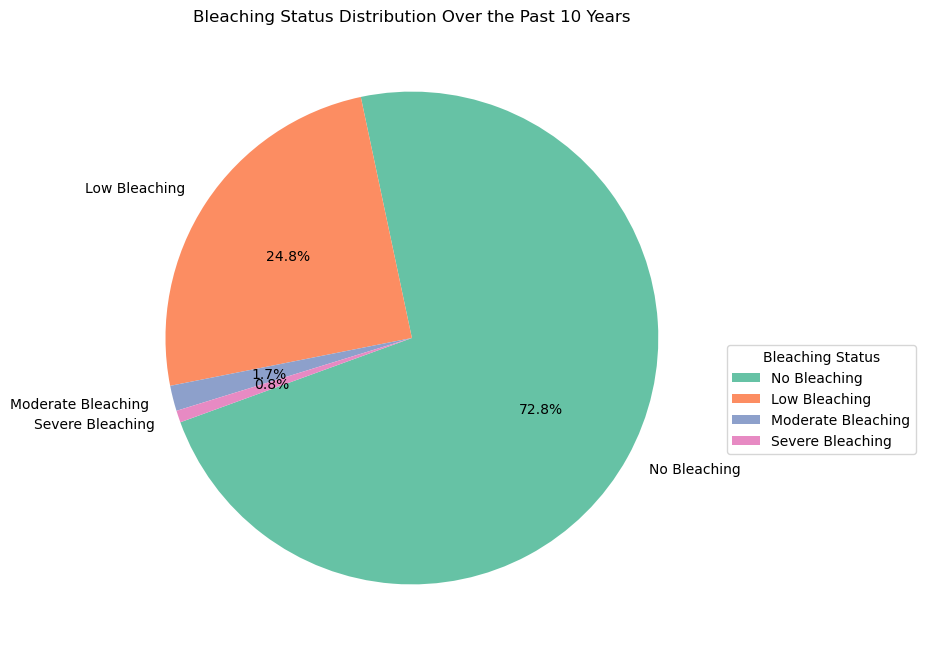

In [30]:
# OBJECTIVE 1
# pie chart to show the ratio for bleaching status

bleaching_status_counts=df["Bleaching_Status"].value_counts()
plt.figure(figsize=(8,8))
plt.title("Bleaching Status Distribution Over the Past 10 Years")
plt.pie(bleaching_status_counts, labels=bleaching_status_counts.index,
       autopct="%1.1f%%", colors=sns.color_palette("Set2"), startangle=200)
plt.legend(bleaching_status_counts.index, title="Bleaching Status", bbox_to_anchor=(1, 0.5), loc="best")
plt.show()

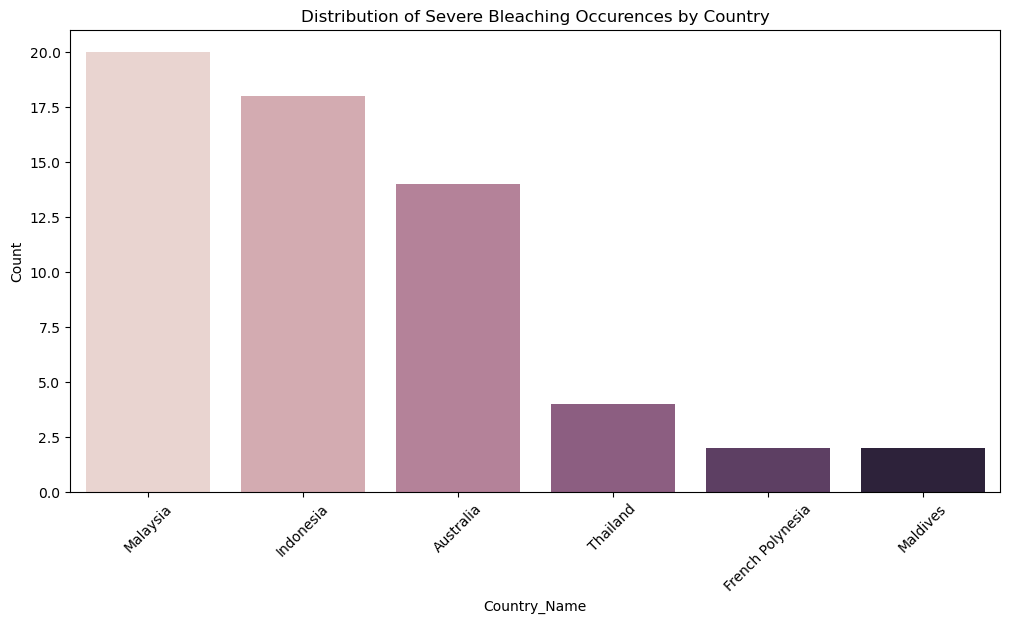

In [31]:
# OBJECTIVE 1
# bar chart to show the frequency/count of each group by country (moderate and severe)
# Severe
bleach_location_df=pd.read_csv("bleaching_status_by_country.csv")
bleach_location_df=bleach_location_df[bleach_location_df["Bleaching_Status"].isin(["Severe Bleaching"])]
bleach_location_df=bleach_location_df.sort_values("Count", ascending=False)

color_palette=sns.cubehelix_palette()
plt.figure(figsize=(12,6))
sns.barplot(data=bleach_location_df, x="Country_Name", y="Count", palette=color_palette)
plt.xticks(rotation=45)
plt.title("Distribution of Severe Bleaching Occurences by Country")
plt.show()

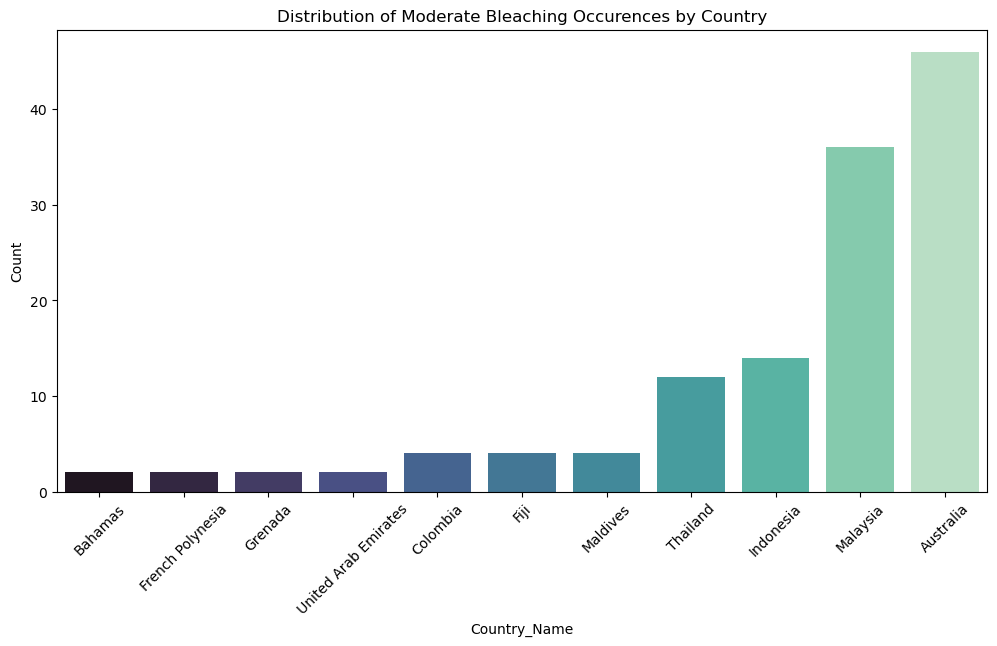

In [33]:
# Moderate

bleach_location_df=pd.read_csv("bleaching_status_by_country.csv")
bleach_location_df=bleach_location_df[bleach_location_df["Bleaching_Status"].isin(["Moderate Bleaching"])]
bleach_location_df=bleach_location_df.sort_values("Count", ascending=True)

plt.figure(figsize=(12,6))
sns.barplot(data=bleach_location_df, x="Country_Name", y="Count", palette="mako")
plt.xticks(rotation=45)
plt.title("Distribution of Moderate Bleaching Occurences by Country")
plt.show()

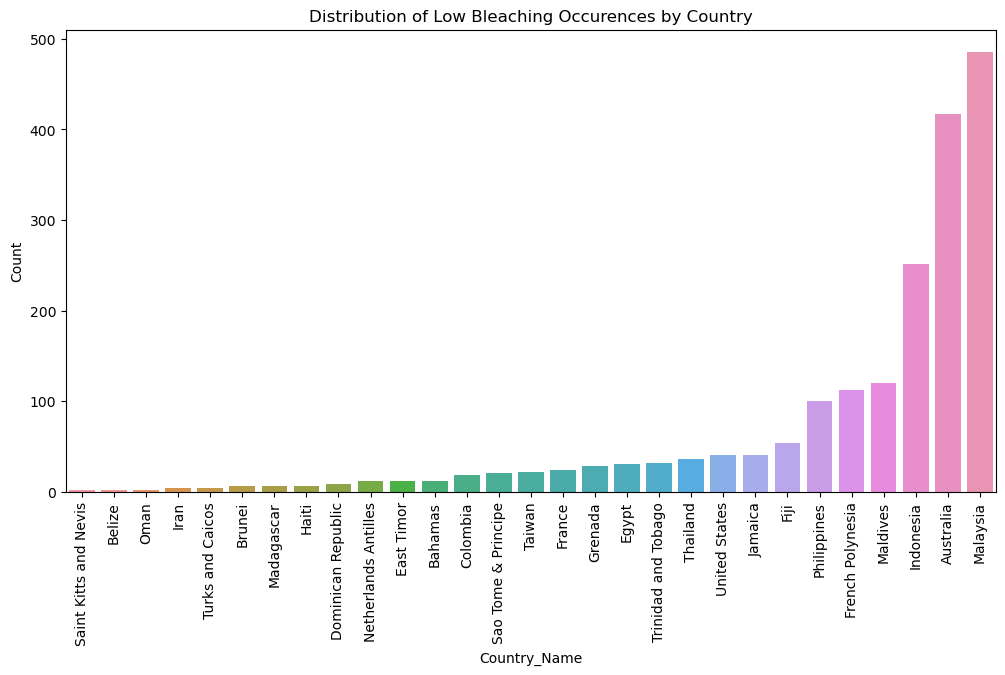

In [34]:
# Low

bleach_location_df=pd.read_csv("bleaching_status_by_country.csv")
bleach_location_df=bleach_location_df[bleach_location_df["Bleaching_Status"].isin(["Low Bleaching"])]
bleach_location_df=bleach_location_df.sort_values("Count", ascending=True)

plt.figure(figsize=(12,6))
sns.barplot(data=bleach_location_df, x="Country_Name", y="Count")
plt.xticks(rotation=90)
plt.title("Distribution of Low Bleaching Occurences by Country")
plt.show()

In [35]:
# OBJECTIVE 1
# heatmap to show locations of bleaching
import folium
from folium.plugins import HeatMap

bleach_location=df[["Bleaching_Status", "Longitude_Degrees", "Latitude_Degrees"]]
m = folium.Map(location=[bleach_location["Latitude_Degrees"].mean(), bleach_location["Longitude_Degrees"].mean()], zoom_start=2)
heat_data = [[point[0], point[1], 1] for point in zip(bleach_location["Latitude_Degrees"], bleach_location["Longitude_Degrees"])]
HeatMap(heat_data).add_to(m)
# m.save("Bleach_Map_Locations.html")

In [36]:
# OBJECTIVE 2
# correlation plot of various factors

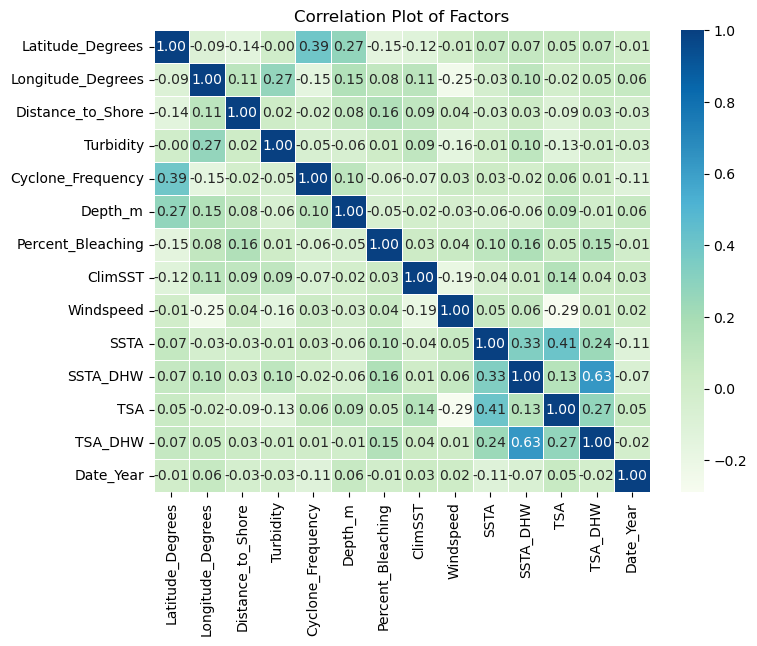

In [37]:
corr_df=df[["Latitude_Degrees", "Longitude_Degrees", "Distance_to_Shore",
           "Turbidity", "Cyclone_Frequency", "Depth_m", "Percent_Bleaching", 
           "ClimSST", "Windspeed", "SSTA", "SSTA_DHW", "TSA", "TSA_DHW", "Date_Year"]]

correlation_matrix = corr_df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='GnBu', fmt=".2f", linewidths=.5)
plt.title('Correlation Plot of Factors')
plt.show()

In [38]:
# OBJECTIVE 2
# scatterplot of depth by location(latitude and longitude)
import plotly.express as px

fig = px.scatter(
    df,
    x="Longitude_Degrees",
    y="Latitude_Degrees",
    size="Depth_m",
    color="Bleaching_Status",
    hover_data=[
        "Distance_to_Shore",
        "Percent_Bleaching",
        "SSTA",
    ],
    labels={"Cyclone_Frequency": "Cyclone Frequency"},
    title="Interactive Scatterplot of Depth by Latitude and Longitude",
)

fig.show()


In [39]:
# OBJECTIVE 1
# compare bleaching_status by ocean using box plot
df_ocean=df[["Ocean_Name", "Bleaching_Status"]]

fig=px.box(
    df_ocean,
    x="Ocean_Name",
    y="Bleaching_Status",
    category_orders={"Bleaching_Status": ["No Bleaching", "Low Bleaching", "Moderate Bleaching", "Severe Bleaching"]},
    title="Bleaching Status by Ocean",
    labels={"Bleaching_Status": "Bleaching Status"},
)

fig.show()

In [40]:
# OBJECTIVE 1
# compare bleaching_status by Realm_Name using histogram density plot / bar graph

df_realm=df[["Realm_Name", "Bleaching_Status"]]
fig = px.histogram(
    df_realm,
    x="Bleaching_Status",
    color="Realm_Name",
    marginal="rug",
    title="Bleaching Status by Realm",
    labels={"Bleaching_Status": "Bleaching Status"},
)

fig.show()

In [41]:
# OBJECTIVE 1
# compare bleaching_status in the State_Island_Province_Name of Malaysia  using bar graph

df_bmalaysia=df[df["Country_Name"]=="Malaysia"]
df_bmalaysia=df_bmalaysia[["Country_Name", "State_Island_Province_Name", "Bleaching_Status"]]

fig=px.bar(
    df_bmalaysia,
    x="State_Island_Province_Name",
    color="Bleaching_Status",
    title="Bleaching Status in Malaysian States/Islands/Provinces",
    labels={"Bleaching_Status": "Bleaching Status"},
)
fig.update_traces(dict(marker_line_width=0))
fig.show()

In [42]:
# OBJECTIVE 1
# compare bleaching_status in the State_Island_Province_Name of Australia using bar graph

df_baustralia=df[df["Country_Name"]=="Australia"]
df_baustralia=df_baustralia[["Country_Name", "State_Island_Province_Name", "Bleaching_Status"]]

fig=px.bar(
    df_baustralia,
    x="State_Island_Province_Name",
    color="Bleaching_Status",
    title="Bleaching Status in Australian States/Islands/Provinces",
    labels={"Bleaching_Status": "Bleaching Status"},
)
fig.update_traces(dict(marker_line_width=0))
fig.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


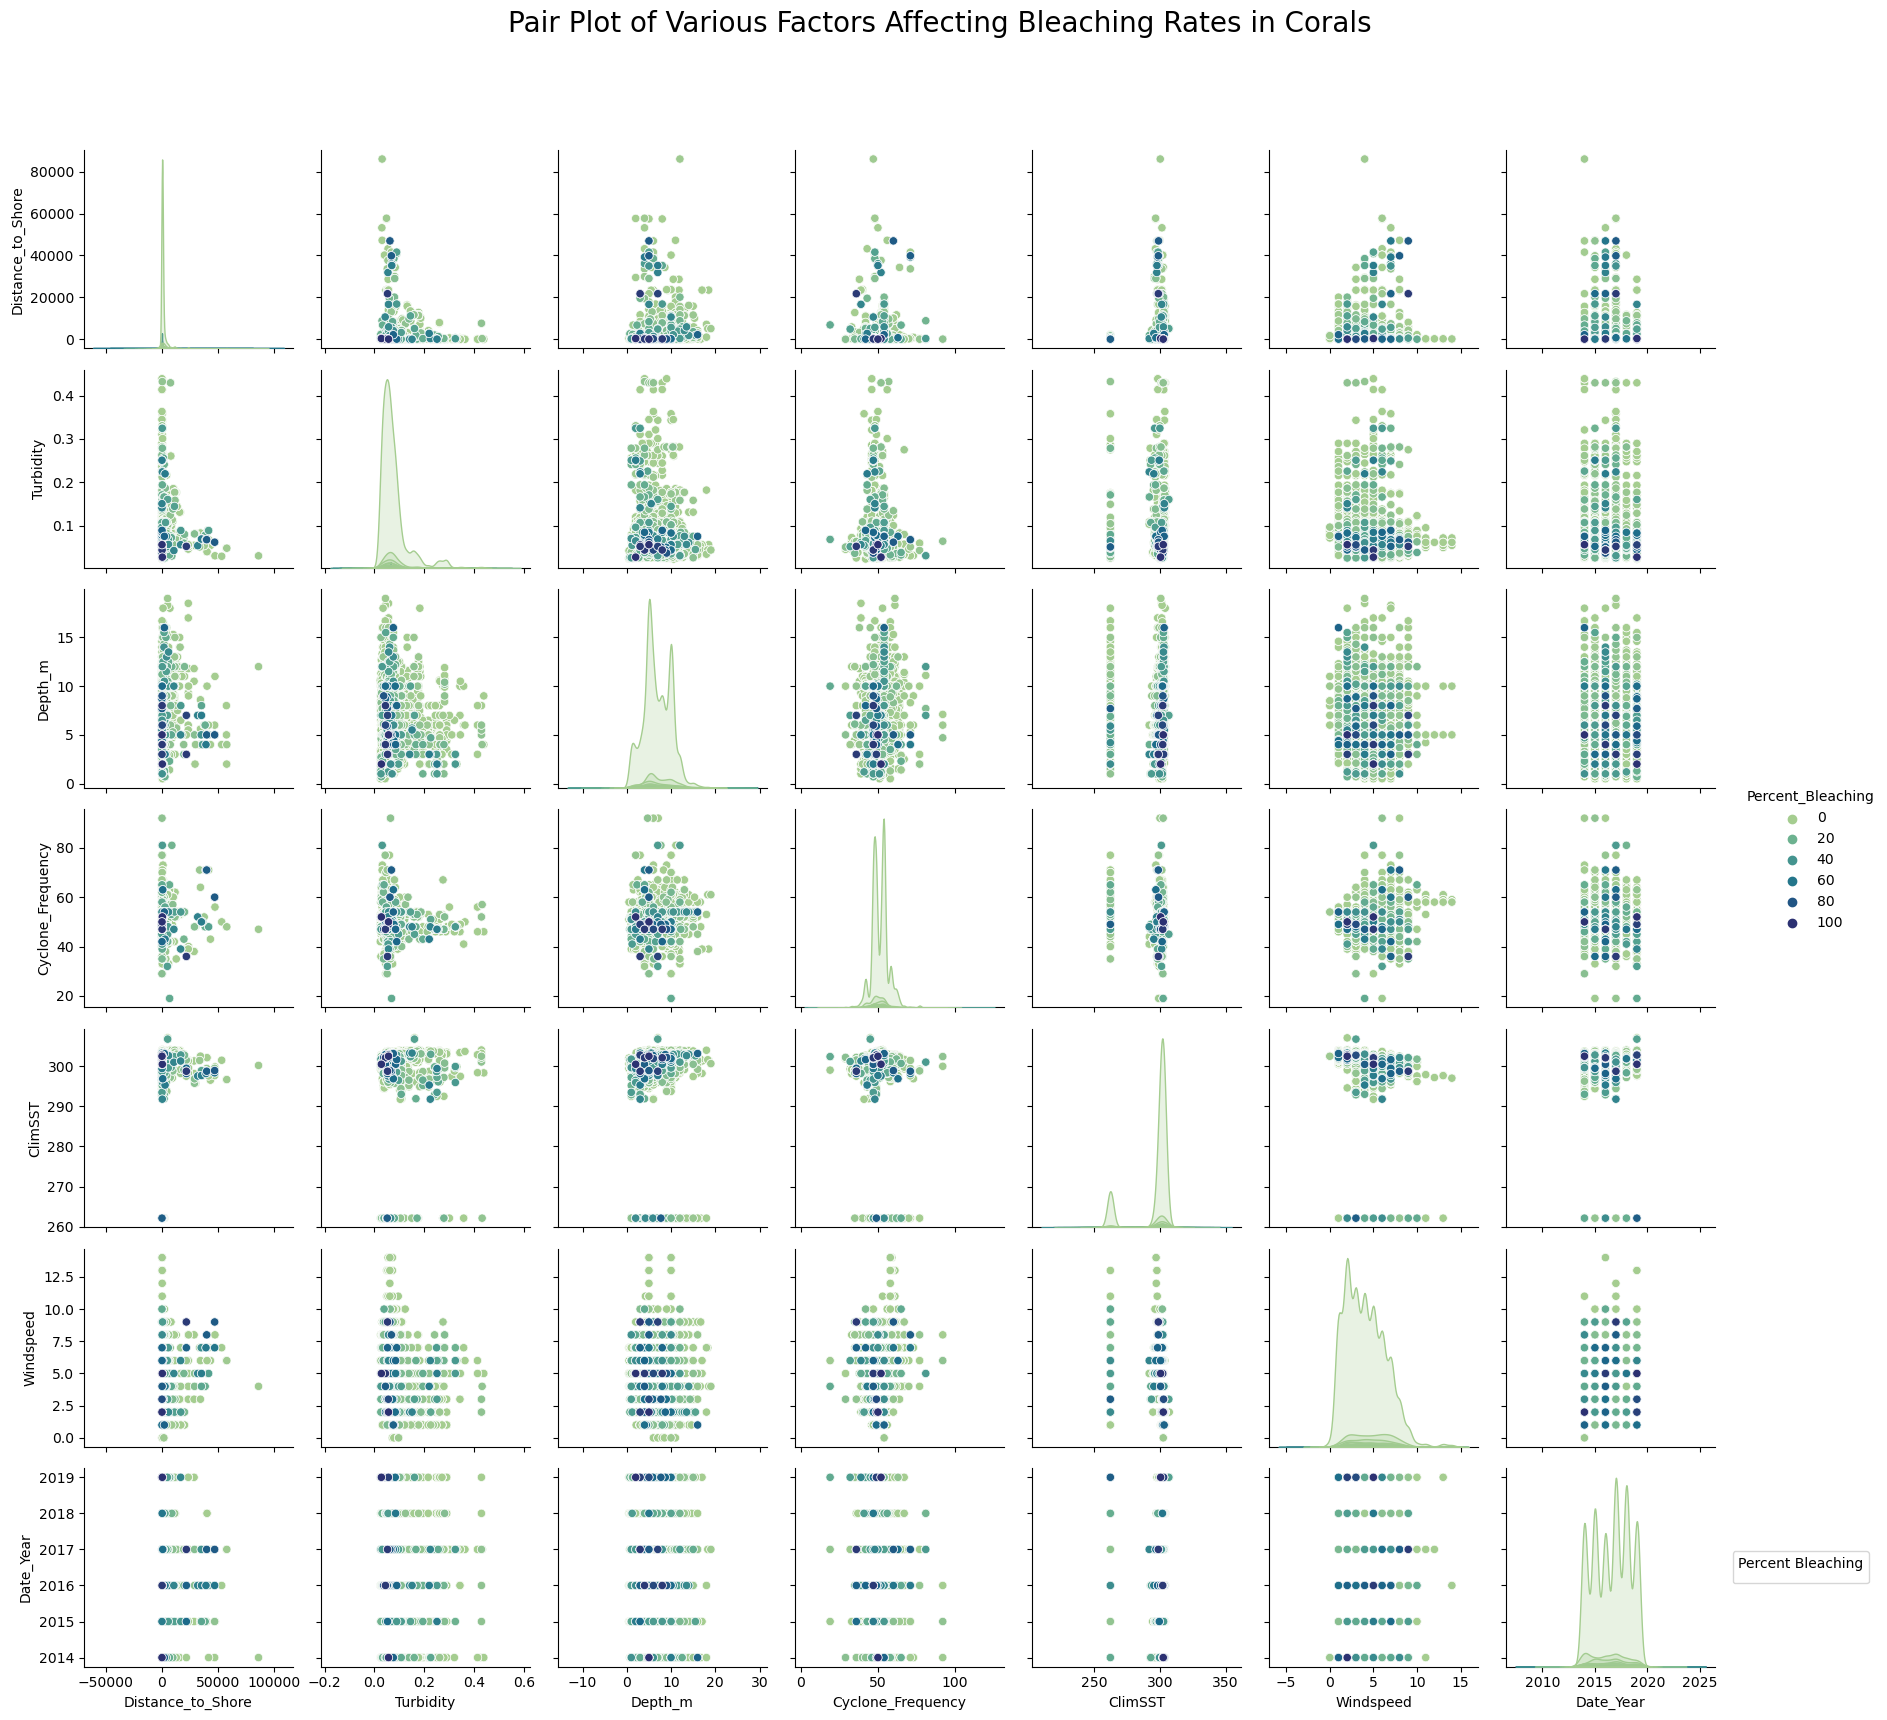

In [43]:
# OBJECTIVE 2
# pairplot of various factors

sns.pairplot(df, vars=["Distance_to_Shore", "Turbidity", "Depth_m", "Cyclone_Frequency", "ClimSST", "Windspeed", "Date_Year"],
            palette="crest",
            hue="Percent_Bleaching")
plt.legend(title="Percent Bleaching", bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.suptitle("Pair Plot of Various Factors Affecting Bleaching Rates in Corals", size=20)
plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

In [44]:
# OBJECTIVE 3
# timeline of percent bleaching for a specific area (malaysia/indonesia, austrlia, southam tourists)

df=pd.read_csv("global_bleaching_environmental.csv")
remove_columns=["Site_ID","Data_Source","Reef_ID",
               "City_Town_Name","Site_Name","Date_Day","Date_Month","Substrate_Name",
               "Temperature_Minimum","Temperature_Maximum","Temperature_Kelvin_Standard_Deviation",
               "SSTA_Standard_Deviation","SSTA_Minimum","SSTA_Maximum","SSTA_Frequency_Standard_Deviation",
               "SSTA_FrequencyMax","SSTA_DHW_Standard_Deviation","SSTA_DHWMax","TSA_Standard_Deviation",
               "TSA_Maximum","TSA_Frequency_Standard_Deviation","TSA_FrequencyMax","TSA_DHW_Standard_Deviation",
               "Date","Site_Comments","Sample_Comments","Bleaching_Comments"]
df=df.drop(columns=remove_columns)
df.replace("nd", None, inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df["Percent_Bleaching"] = pd.to_numeric(df["Percent_Bleaching"])
df["Percent_Bleaching"] = df["Percent_Bleaching"].astype(int)

/var/folders/q4/414ry47d1hv7zj62ggf6vkz40000gn/T/ipykernel_50703/542858306.py:4: DtypeWarning:

Columns (13,15,24) have mixed types. Specify dtype option on import or set low_memory=False.



In [45]:
df_australia=df[df["Country_Name"]=="Australia"]
df_australia=df_australia[["Country_Name", "Date_Year", "Percent_Bleaching"]]

df_malayindo=df[df["Country_Name"].isin(["Malaysia", "Indonesia"])]
df_malayindo=df_malayindo[["Country_Name", "Date_Year", "Percent_Bleaching"]]

df_tourist_southam=df[df["Country_Name"].isin(["Bahamas", "Colombia", "Jamaica", "Maldives",
                                           "Turks and Caicos", "Trinidad and Tobago"])]
df_tourist_southam=df_tourist_southam[["Country_Name", "Date_Year", "Percent_Bleaching"]]

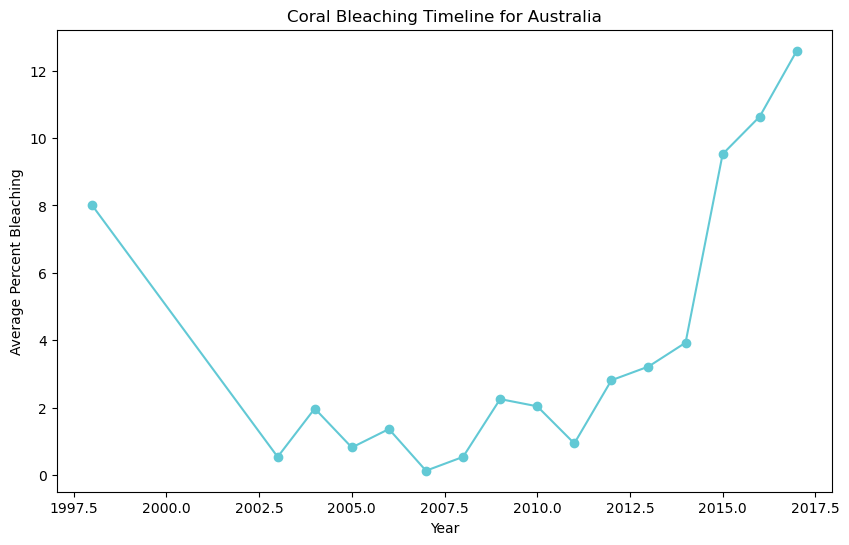

In [46]:
avg_bpy_australia=df_australia.groupby("Date_Year")["Percent_Bleaching"].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(avg_bpy_australia["Date_Year"], avg_bpy_australia["Percent_Bleaching"], marker='o', linestyle='-',
        color="#62C9D5")

plt.title("Coral Bleaching Timeline for Australia")
plt.xlabel("Year")
plt.ylabel("Average Percent Bleaching")
plt.show()

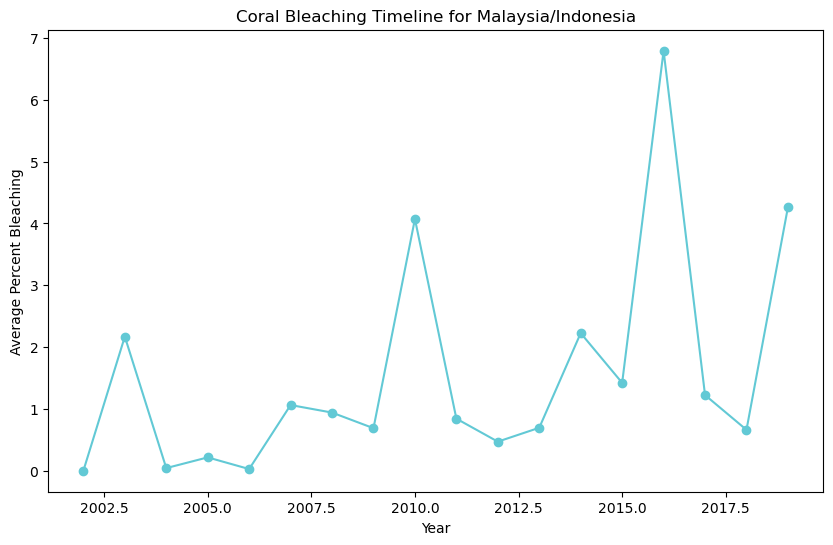

In [47]:
avg_bpy_malayindo=df_malayindo.groupby("Date_Year")["Percent_Bleaching"].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(avg_bpy_malayindo["Date_Year"], avg_bpy_malayindo["Percent_Bleaching"], marker='o', linestyle='-',
        color="#62C9D5")

plt.title("Coral Bleaching Timeline for Malaysia/Indonesia")
plt.xlabel("Year")
plt.ylabel("Average Percent Bleaching")
plt.show()

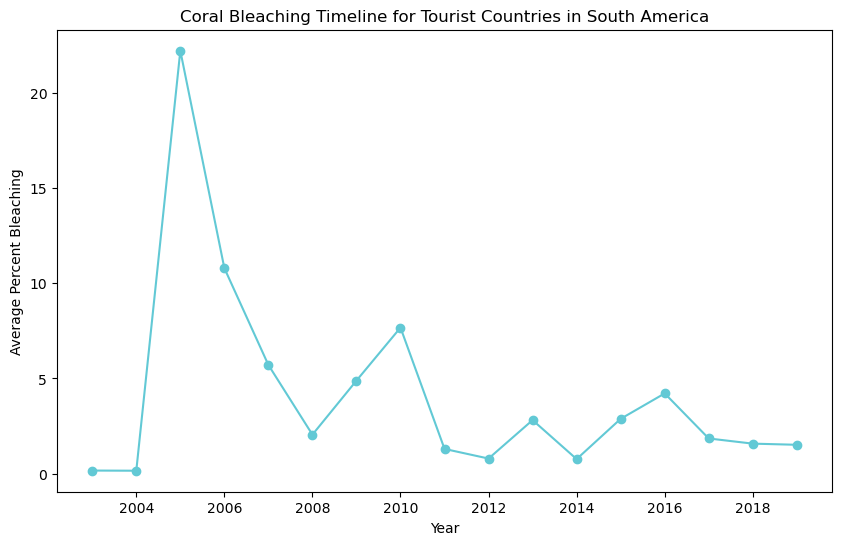

In [48]:
avg_bpy_tourist_southam=df_tourist_southam.groupby("Date_Year")["Percent_Bleaching"].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.plot(avg_bpy_tourist_southam["Date_Year"], avg_bpy_tourist_southam["Percent_Bleaching"], marker='o', linestyle='-',
        color="#62C9D5")

plt.title("Coral Bleaching Timeline for Tourist Countries in South America")
plt.xlabel("Year")
plt.ylabel("Average Percent Bleaching")
plt.show()